# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0383 Желнин Максим. Вариант №54

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие 

$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** — тройка чисел <M, A, N>, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = (^2_g) - A - M$

**Индекс взаимности Каца-Пауэлла** — хар-ка измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i -> j ∩ j -> i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе $p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekpfix} = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

**Нулевые гипотезы**

$H_0: L \sim B(g(g-1), \frac{1}{2})$

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

$H_0 : L \sim B(g(g-1), P_0)$

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [1]:
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [27]:
# Вариант 66
g <- 80
p <- 0.50
P0 <- 0.71
alpha <- 0.04

1)  С помощью библиотеки igraph смоделировать случайный орграф
G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите
её.

In [62]:
random_graph <- erdos.renyi.game(g, p, directed=TRUE)

Используем вариант с G(g, p). В данном случае между вершинами будут случайно расставляться рёбра с вероятностью $p$. Вероятность построить граф с $g$ узлами и $L$ рёбрами равна:

$p^L (1-p)^{(^2_n) - L}$.


2)  Отобразить полученный орграф.

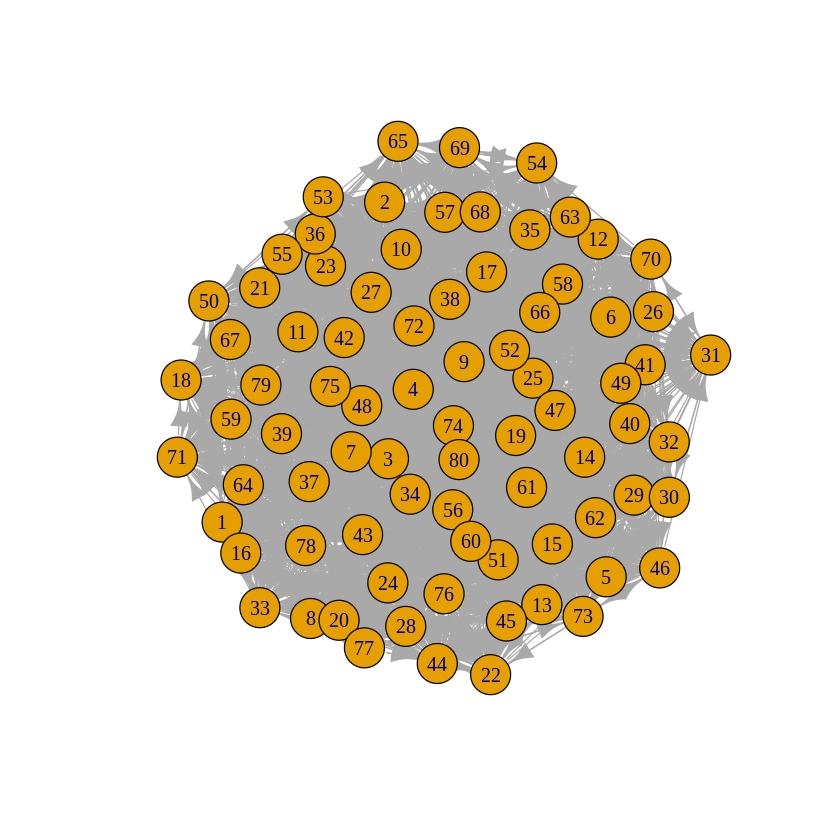

In [29]:
plot(random_graph)

3) Вычислить «пятичисловую сводку» для графа G𝑑.

In [30]:
cat("Size: ", gorder(random_graph))
cat("\nDensity: ", edge_density(random_graph))
cat("\n# components: ", count_components(random_graph))
cat("\nDiameter: ", diameter(random_graph))
cat("\nClustering coefficient: ", transitivity(random_graph))

Size:  80
Density:  0.5018987
# components:  1
Diameter:  2
Clustering coefficient:  0.7514098

4) Вычислить цензус диад. Сделать выводы.

In [31]:
census <- dyad_census(random_graph)
census

$mut
[1] 796

$asym
[1] 1580

$null
[1] 784

Выводы:

Взаимных диад 796

Однонаправленных отношений 1580

Несвязных акторов 784

5) Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

Оценка при фиксированном выборе по методу моментов:

In [35]:
d <- 60
ind_kp <- (2*(g-1) * census$mut - g*d*d) / (g*d*(g-1-d))
cat("При фиксированном d=60 индекс: ", ind_kp)

При фиксированном d=60 индекс:  -1.77886

Оценка при свободном выборе:

In [33]:
adj_matrix <- as_adjacency_matrix(random_graph)
matr <- as.matrix(adj_matrix)
L_list <- rowSums(matr)
L <- sum(L_list)
L2_list <- rep(0, nrow(matr))
for(row in 1:nrow(matr))
  L2_list[row] <- L_list[row]*L_list[row]

L2 <- sum(L2_list)
ind_kp_free <- (2 * (g - 1) * (g - 1) * census$mut - L * L + L2) / (L * (g-1)* (g-1) - L*L + L2)
cat("При свободном выборе индекс:", ind_kp_free)

При свободном выборе индекс: 0.0001488504

Выводы: Оценка при свободном выборе получилась 0.00015, а при фиксированном и равном 60 -1.77. Разница велика.

6) Вычислить вероятность того, что связь будет взаимной для каждого случая.

Фиксированный

In [36]:
p_fixed <- (d / (g-1)) * ((d/(g-1)) + ind_kp*(g - 1 - d) / (g - 1))
cat("При фиксированном выборе вероятность: ", p_fixed)

При фиксированном выборе вероятность:  0.2518987

Свободный

In [37]:
p_free = 0
for(row in 1:(nrow(matr) - 1))
  for(row2 in (row + 1):nrow(matr))
    p_free <- p_free + (L_list[row] * L_list[row2])/((g-1)*(g-1))
p_free = p_free * 2 / (g*(g-1))
p_free

[1] 0.2518615

Несмотря на большую разницу в оценках, итоговые вероятности получились практически одинаковыми.

7) Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [45]:
g_func <- function(t) {
    return(sum(x_plus[1:t]) -t*(t-1) - if(t>=g) 0 else sum(min(x_plus[(t+1):g], rep(t, (g-t-1+1)))))
}

f_func <- function(t) {
    return(sum(x_plus[1:t]) - t*(g-1)-choose(g,2))
}

Mmin <- f_func(0)
for(i in 1:g) {
    if(Mmin < f_func(i)){
        Mmin <- f_func(i)
    }
}

g_max <- g_func(0)
for(i in 1:g) {
    if(g_max < g_func(i)){
        g_max <- g_func(i)
    }
}
Mmax <- 0.5*(sum(x_plus)-g_max)
           
p_b <- (census$mut-Mmin)/(Mmax-Mmin)
p_b

[1] 0.8652781

Индекс получился около 0.86, то есть количество взаимных диад примерно 17/20. Здесь акторы часто образуют взаимные связи.

8) Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.


In [49]:
x <- as.matrix(as_adjacency_matrix(random_graph))
I <- sum(x)
zI <- (I - g * (g - 1) / 2) / (g * (g - 1) / 4) ** (1 / 2)
p_value <- 0.5 - 0.5*pnorm(zI)
cat("Статистика критерия: ", zI, "\nMax значения уровня значимости: ", p_value, "\nГипотеза верна: ", p_value >= alpha/2,"\n")
   

Статистика критерия:  0.3018928 
Max значения уровня значимости:  0.1906835 
Гипотеза верна:  TRUE 


Гипотеза верна. p_value = 0.19 (max значения уровня значимости)

9)  Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается. 

In [54]:
I <- sum(x)
zI <- (I - P0*g * (g - 1)) / (g * (g - 1)*P0*(1-P0)) ** (1 / 2)
p_value <- 0.5 - 0.5*pnorm(zI)
cat("Статистика критерия: ", zI, "\nMax значения уровня значимости: ", p_value, "\nГипотеза верна: ", p_value >= alpha/2,"\n")
 

Статистика критерия:  -36.45903 
Max значения уровня значимости:  0.5 
Гипотеза верна:  TRUE 


Гипотеза верна. p_value = 0.5 (max значения уровня значимости)

10) Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы

In [61]:
p_Estimation <- L / (g*(g-1))
laplasI = 0.5 - 0.96/2
laplasI
ZAlpha <- 0.05 # По таблице функции Лапласа
plower <- p_Estimation - ZAlpha*sqrt(p_Estimation * (1 - p_Estimation) / (g*(g-1)))
pupper <- p_Estimation + ZAlpha*sqrt(p_Estimation * (1 - p_Estimation) / (g*(g-1)))

plower
pupper

[1] 0.02

[1] 0.5015843

[1] 0.5022132

Доверительный интервал получается следующий: 0.5016 $\leqslant$ $p_e$ $\leqslant$ 0.5022 
То есть с вероятность в 95% p лежит в этом промежутке, что, если учесть погрешность, соответствует действительности.

## Выводы

В ходе практической работы был проведен статистический анализ случайно смоделированного ориентированного графа на основе модели Эрдеша—Реньи с использованием библиотек igraph.

В результате работы был проанализирован случайно сгенерированный граф с данными параметрами: $ p = 0.50, g = 80$. В ходе работы были расчитаны индексы Каца-Пауэлла и Бандиопадхьяйя, расчитаны их оценки и вероятности. А в конце работы была получена оценка значения p, которая соответствовала действительности с учетом погрешностей.